*Confidencial*
<div style="margin:0 0px 0px 0;width: 200px;" markdown="1">
    Universidad de la rioja
    Av. de la Paz, 137, 26006 Logroño, La Rioja, Spain
</div>

### 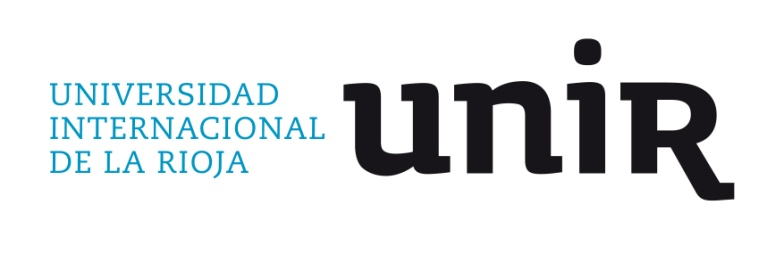
----
|Versión|Autor/es|Fecha|Comentarios|
|:--|:------|:---------------------------------------------------------|:---------|
|1|Salvador Vigo|13/01/2019|Creación del documento |

---
[TOC]

---
# FOURIER TRANSFORMS PARA BÚSQUEDA DE PATRONES EN SEÑALES FISIOLÓGICAS

Objetivos del informe:

+ Código relacionado con el Trabajo Fin de Master realizado por el alumno Salvador Vigo Mármol durante el desarrollo del master universitario de Inteligencia Artificial ofrecido por la UNIR. En él se describe el proceso de investigación seguido por el alumno consistente en analizar señales fisiológicas procedentes del miocardio, através de su espectro de frecuencia dado por la Transformada de Fourier
+ Este código es parte de la memoria del TFM y en él se describe el proceso puramente de análisis computacional de las señales. Para el resto de información deberan referisrse al resto de la memoria.


**Proceso seguido**

+ Se cargan las seáles procedentes del framework wfdb-python. WFDB es el paquete nativo waveform-database de Python. Una librería de herramientas para leer, escribir y procesar WFDB señales y anotaciones.
+ Añadimos tambien algunas señales periódicas de forma manual para trabajar las comparativas. 
+ La idea es comparar las señales en su forma original con la transformada de fourier de ellas mismas. El espectro de frecuencia obtenido al aplicar la transformada, nos puede dar una idea de como se comportan las señales a nivel frecuencial y así poder analizar que tipo de patrones pueden seguir. 
+ También utilizamos el algoritmo de clustering KMeans disponible en SKlearn para analizar por clouster los patrones obtenidos. 
+ El proceso se repetirá para diferentes entrdas de señal a fin de tener mas datos con los que experimentar. 

Para el proceso de transformada de Fourier se ha usado Fourier Transforms (scipy.fftpack). Fast Fourier Transform (FFT) es un algoritmo que computa de manera rápida y eficaz la transformada de Fourier discreta, que es la utilizada en este proyecto

La herramienta kmeans tiene los siguientes parámetros:

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 1,
 'precompute_distances': 'auto',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}
 

### Resultados

Para una arquitectura con los siguientes parámetros:
- SAMPFROM = 0
- SAMPTO = 80000
- SAMPLES = SAMPTO - SAMPFROM
- CUT = 100 / 1000 / 10000
- N = SAMPLES
- N2 = CUT
- T = 1/800


Los resultados son variados y se analizaran en la memoria. Como primer punto de partida lo que se puede observar es que en las visualizaciones de las transformada de Fourier, se aprecia como los picos en las señales dan una clara intuición de que señales son mas propensas a contener patrones dentro de ellas y cuales menos. Aún así hay que ser cauto con los resultados, ya que a la hora de aplicar el modelo de clousters vemos que la dispersión en los puntos del centroide da una información también importante a cerca de la contención de patrones.

In [1]:
print(__doc__)
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from IPython.display import display
from scipy.fftpack import fft, ifft
import numpy as np
import os
import shutil
import pylab as p
import math

import wfdb

SAMPFROM = 0
SAMPTO = 80000
SAMPLES = SAMPTO - SAMPFROM
CUT = 1000
N = SAMPLES
N2 = CUT
T = 1/800

Automatically created module for IPython interactive environment


## Signals description

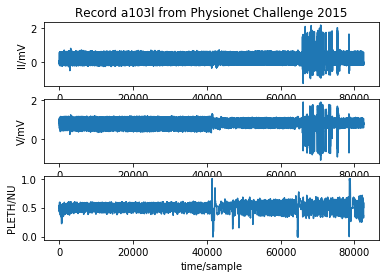

{'record_name': 'a103l',
 'n_sig': 3,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 82500,
 'base_time': None,
 'base_date': None,
 'comments': ['Asystole', 'False alarm'],
 'sig_name': ['II', 'V', 'PLETH'],
 'p_signal': array([[-0.02359597,  0.86758555,  0.48220271],
        [-0.03698082,  0.98298479,  0.5443735 ],
        [-0.06292259,  0.85979087,  0.47821229],
        ..., 
        [-0.04084449,  0.7493346 ,  0.5150838 ],
        [-0.04719194,  0.7581749 ,  0.50957702],
        [-0.04677798,  0.7615019 ,  0.5028731 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a103l.mat', 'a103l.mat', 'a103l.mat'],
 'fmt': ['16', '16', '16'],
 'samps_per_frame': [1, 1, 1],
 'skew': [None, None, None],
 'byte_offset': [24, 24, 24],
 'adc_gain': [7247.0, 10520.0, 12530.0],
 'baseline': [0, 0, 0],
 'units': ['mV', 'mV', 'NU'],
 'adc_res': [16, 16, 16],
 'adc_zero': [0, 0, 0],
 'init_value': [-171, 9127, 6042],
 'checksum': [-27403, -301, -173

In [2]:
# Demo 1 - Read a wfdb record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord('sample-data/a103l') 
wfdb.plot_wfdb(record=record, title='Record a103l from Physionet Challenge 2015') 
display(record.__dict__)

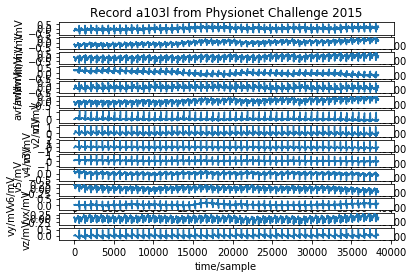

{'record_name': 's0010_re',
 'n_sig': 15,
 'fs': 1000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 38400,
 'base_time': None,
 'base_date': None,
 'comments': ['age: 81',
  'sex: female',
  'ECG date: 01/10/1990',
  'Diagnose:',
  'Reason for admission: Myocardial infarction',
  'Acute infarction (localization): infero-latera',
  'Former infarction (localization): no',
  'Additional diagnoses: Diabetes mellitus',
  'Smoker: no',
  'Number of coronary vessels involved: 1',
  'Infarction date (acute): 29-Sep-90',
  'Previous infarction (1) date: n/a',
  'Previous infarction (2) date: n/a',
  'Hemodynamics:',
  'Catheterization date: 16-Oct-90',
  'Ventriculography: Akinesia inferior wall',
  'Chest X-ray: Heart size upper limit of norm',
  'Peripheral blood Pressure (syst/diast):  140/80 mmHg',
  'Pulmonary artery pressure (at rest) (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (mean): n/a',
  'Pulmonary capillary wedge pressure (at rest): n/a',
  'Cardiac outp

In [3]:
# Demo 1 - Read a wfdb record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord('sample-data/s0010_re') 
wfdb.plot_wfdb(record=record, title='Record a103l from Physionet Challenge 2015') 
display(record.__dict__)

## Functions definition

In [4]:
def signal_sampler(signal, CUT):
    """
    Function to create an array  that contents in each row a segment of an entire 
    signal

    params:
        - signal: The raw signal
        - CUT: The size of the slide
    returns:
        - input_array: Array of signal slides
    """
    ## redimension original signal_array
    N_ARRAY_SAMPLES = math.floor(len(signal)/CUT)
    signal = signal[:N_ARRAY_SAMPLES*CUT]
    
    ## define array
    input_array = np.zeros(shape=(N_ARRAY_SAMPLES,CUT))
    
    for i in range(N_ARRAY_SAMPLES):
        input_array[i] = signal[i*CUT:(i+1)*CUT]
    
    
    return input_array

In [5]:
def fft_sampler(input_array):
    """
    Function to create an array  that contents in each row a segment of an entire 
    Fourier transform from the signal

    params:
        - input_array: The array we want to transform into FFT
    returns:
        - fft_input_array: Array of signal slides after FFT
    """  
    ## define array
    fft_input_array = np.zeros(shape=input_array.shape)
    
    for i in range(input_array.shape[0]):
        fft_input_array[i] = fft(input_array[i])
    
    return fft_input_array

In [6]:
def sig_subploteo(sig, sig2, sig3, sig4):
    """
    Function to subplot the raw signals

    params:
        - sig, sig2, sig3, sig4: array signals to subplot
    """
    %matplotlib inline
    plt.figure(figsize=(15,15))
    
    plt.subplot(221)
    plt.plot(sig)
    plt.title("Asystole signal 'II'")
    
    plt.subplot(222)
    plt.plot(sig2)
    plt.title("Asystole signal 'V'")
    
    plt.subplot(223)
    plt.plot(sig3)
    plt.title("Sinusoidal signal")
    
    plt.subplot(224)
    plt.plot(sig4)
    plt.title("Random signal")
    
    plt.show()

In [7]:
def kmean_subploteo(sig, sig2, sig3, sig4, cluster_list, switch):
    """
    Function to subplot the cluster of the raw signals

    params:
        - sig, sig2, sig3, sig4: array signals to subplot
        - cluster_list: A list of kmeans models of the signals
        - switch: Param to switch between FFT signals or raw signals. Boolean
    """
    %matplotlib inline
    plt.figure(figsize=(15,15))
    
    if switch == True:
        plt.subplot(221)
        plt.scatter(sig[:, 0], sig[:, 1], c=cluster_list[0])
        plt.title("Asystole signal 'II' clousters")

        plt.subplot(222)
        plt.scatter(sig2[:, 0], sig2[:, 1], c=cluster_list[1])
        plt.title("Asystole signal 'V' clousters")

        plt.subplot(223)
        plt.scatter(sig3[:, 0], sig3[:, 1], c=cluster_list[3])
        plt.title("Sinusoidal signal clousters")

        plt.subplot(224)
        plt.scatter(sig4[:, 0], sig4[:, 1], c=cluster_list[4])
        plt.title("Random signal clousters")
    else:
        plt.subplot(221)
        plt.scatter(sig[:, 0], sig[:, 1], c=cluster_list[0])
        plt.title("Asystole signal 'II' FFT clousters")

        plt.subplot(222)
        plt.scatter(sig2[:, 0], sig2[:, 1], c=cluster_list[1])
        plt.title("Asystole signal 'V' FFT clousters")

        plt.subplot(223)
        plt.scatter(sig3[:, 0], sig3[:, 1], c=cluster_list[3])
        plt.title("Sinusoidal signal FFT clousters")

        plt.subplot(224)
        plt.scatter(sig4[:, 0], sig4[:, 1], c=cluster_list[4])
        plt.title("Random signal FFT clousters")
    

    plt.show()

In [8]:
def fft_subploteo(fft_array_list):
    """
    Function to subplot the fft signals

    params:
        - fft_array_list: array fft signals to subplot
    """
    xf = np.linspace(0.0, 1.0/(2.0*T), N2//2)
    
    %matplotlib inline
    plt.figure(figsize=(15,15))
    
    plt.subplot(221)
    plt.plot(xf, 2.0/N2 * np.abs(fft_array_list[0][0:N2//2]))
    plt.title("Asystole signal 'II' FFT")
    
    plt.subplot(222)
    plt.plot(xf, 2.0/N2 * np.abs(fft_array_list[1][0:N2//2]))
    plt.title("Asystole signal 'V' FFT")
    
    plt.subplot(223)
    plt.plot(xf, 2.0/N2 * np.abs(fft_array_list[3][0:N2//2]))
    plt.title("Sinusoidal signal FFT")
    
    plt.subplot(224)
    plt.plot(xf, 2.0/N2 * np.abs(fft_array_list[4][0:N2//2]))
    plt.title("Random signal clousters FFT")
    
    plt.grid()
    plt.show()

In [9]:
# Load the signals
signals, fields = wfdb.rdsamp('sample-data/a103l', channels=[0], sampfrom=SAMPFROM, sampto=SAMPTO)
signals = np.reshape(signals, SAMPLES)

signals2, fields = wfdb.rdsamp('sample-data/a103l', channels=[1], sampfrom=SAMPFROM, sampto=SAMPTO)
signals2 = np.reshape(signals2, SAMPLES)

signals3, fields = wfdb.rdsamp('sample-data/100', channels=[1], sampfrom=SAMPFROM, sampto=SAMPTO)
signals3 = np.reshape(signals3, SAMPLES)

x = np.linspace(0.0, N*T, N)
signals4 = np.sin(50 * 2.0*np.pi*x) + 2*np.sin(70 * 2.0*np.pi*x)

signals5 = np.random.rand(N)

signals6, fields = wfdb.rdsamp('sample-data/100', channels=[0], sampfrom=SAMPFROM, sampto=SAMPTO)
signals6 = np.reshape(signals6, SAMPLES)

## Visualization for CUT=1000

In [10]:
# Signals initialization 
sig = signal_sampler(signals, CUT)
sig2 = signal_sampler(signals2, CUT)
sig3 = signal_sampler(signals3, CUT)
sig4 = signal_sampler(signals4, CUT)
sig5 = signal_sampler(signals5, CUT)
sig6 = signal_sampler(signals6, CUT)

In [11]:
print(sig.shape)
print(sig2.shape)
print(sig3.shape)
print(sig4.shape)

(80, 1000)
(80, 1000)
(80, 1000)
(80, 1000)


In [12]:
# Cluster inizilization
kmeans = KMeans(n_clusters=3, random_state=0)

cluster_list = [kmeans.fit_predict(sig), kmeans.fit_predict(sig2), kmeans.fit_predict(sig3), 
                kmeans.fit_predict(sig4), kmeans.fit_predict(sig5), kmeans.fit_predict(sig6)]

In [13]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 1,
 'precompute_distances': 'auto',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

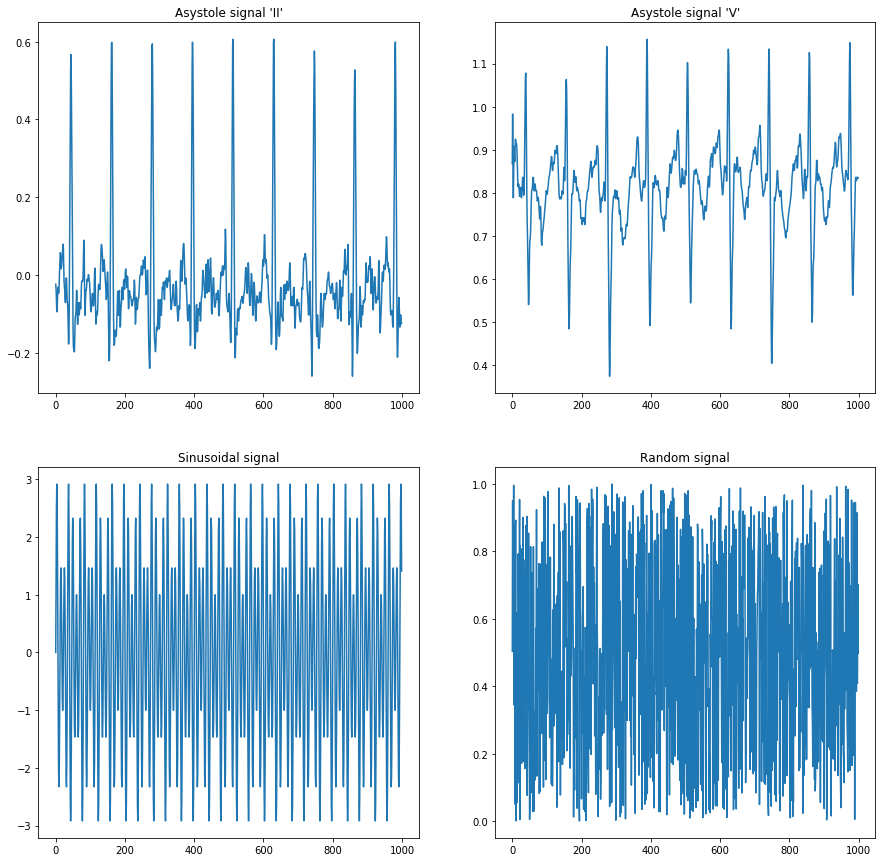

In [14]:
# Raw slide signals visualization
sig_subploteo(sig[0], sig2[0], sig4[0], sig5[0])

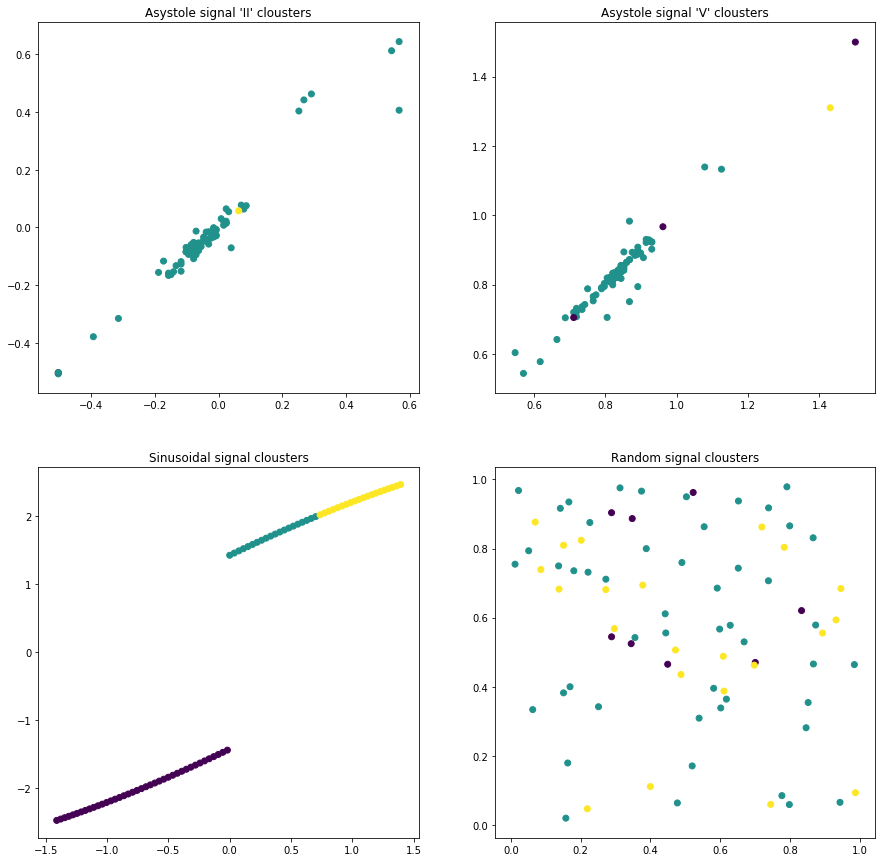

In [15]:
# Signal cluster visualization
kmean_subploteo(sig, sig2, sig4, sig5, cluster_list, True)

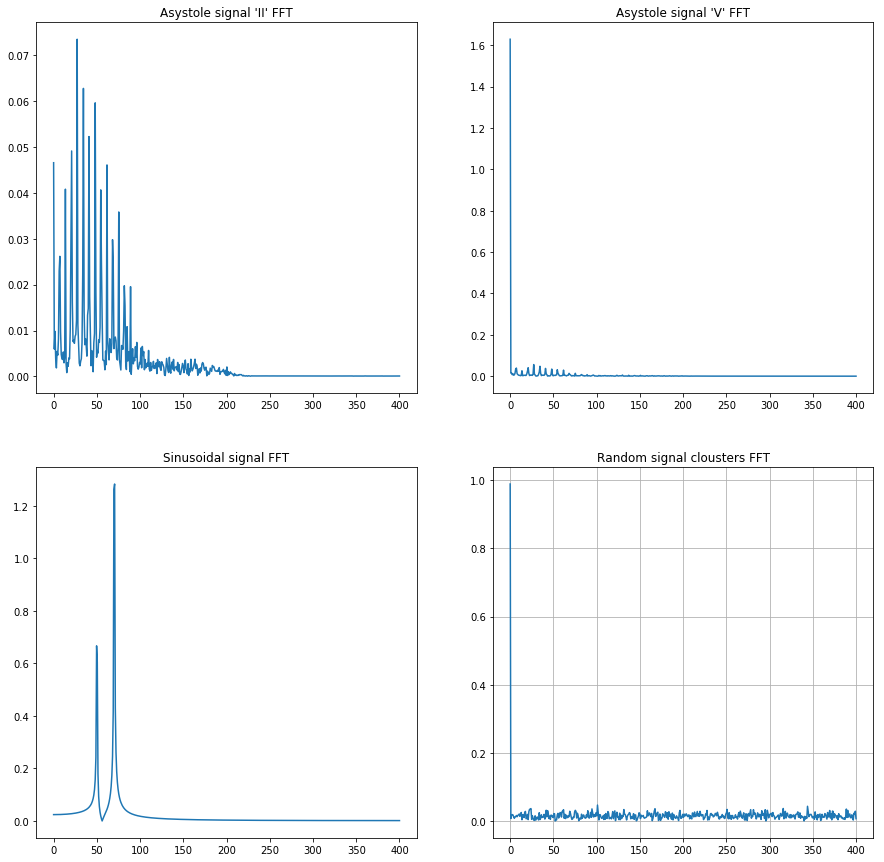

In [16]:
# Fourier transform visualization from raw signals
fft_array_list = [fft(sig[0]), fft(sig2[0]), fft(sig3[0]), fft(sig4[0]), fft(sig5[0]), fft(sig6[0])]
fft_subploteo(fft_array_list)

In [19]:
# Fourier transform from the cluster and visualization
fft_sig = fft_sampler(sig)
fft_sig2 = fft_sampler(sig2)
fft_sig3 = fft_sampler(sig3)
fft_sig4 = fft_sampler(sig4)
fft_sig5 = fft_sampler(sig5)
fft_sig6 = fft_sampler(sig6)

/home/savi01/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


In [20]:
fft_cluster_list = [kmeans.fit_predict(fft_sig), kmeans.fit_predict(fft_sig2), kmeans.fit_predict(fft_sig3), 
                    kmeans.fit_predict(fft_sig4), kmeans.fit_predict(fft_sig5), kmeans.fit_predict(fft_sig6)]

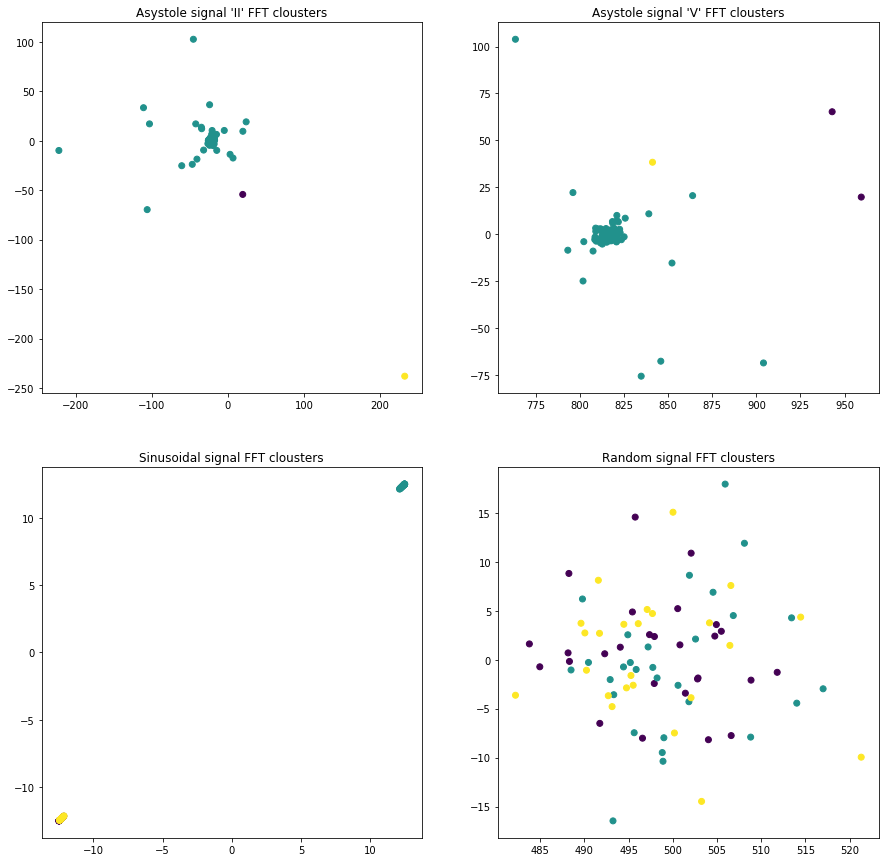

In [21]:
kmean_subploteo(fft_sig, fft_sig2, fft_sig4, fft_sig5, fft_cluster_list, False)

## Visualization for CUT=100

In [22]:
SAMPFROM = 0
SAMPTO = 80000
SAMPLES = SAMPTO - SAMPFROM
CUT = 100
N = SAMPLES
N2 = CUT
T = 1/800

In [23]:
sig = signal_sampler(signals, CUT)
sig2 = signal_sampler(signals2, CUT)
sig3 = signal_sampler(signals3, CUT)
sig4 = signal_sampler(signals4, CUT)
sig5 = signal_sampler(signals5, CUT)
sig6 = signal_sampler(signals6, CUT)

In [24]:
cluster_list = [kmeans.fit_predict(sig), kmeans.fit_predict(sig2), kmeans.fit_predict(sig3), 
                kmeans.fit_predict(sig4), kmeans.fit_predict(sig5), kmeans.fit_predict(sig6)]

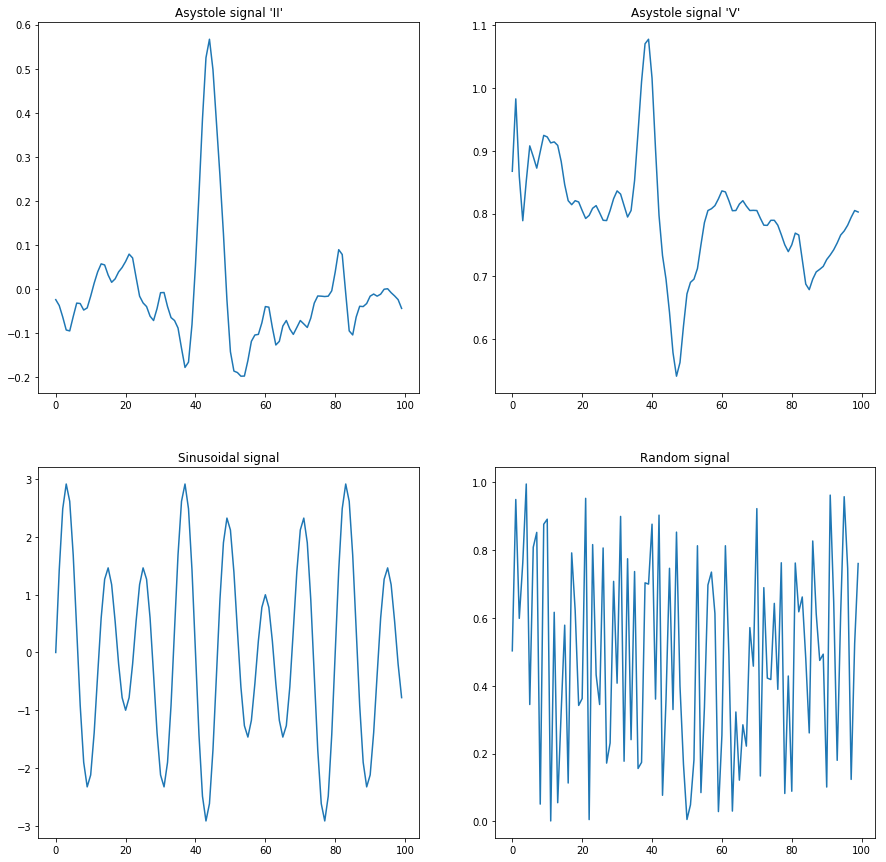

In [25]:
sig_subploteo(sig[0], sig2[0], sig4[0], sig5[0])

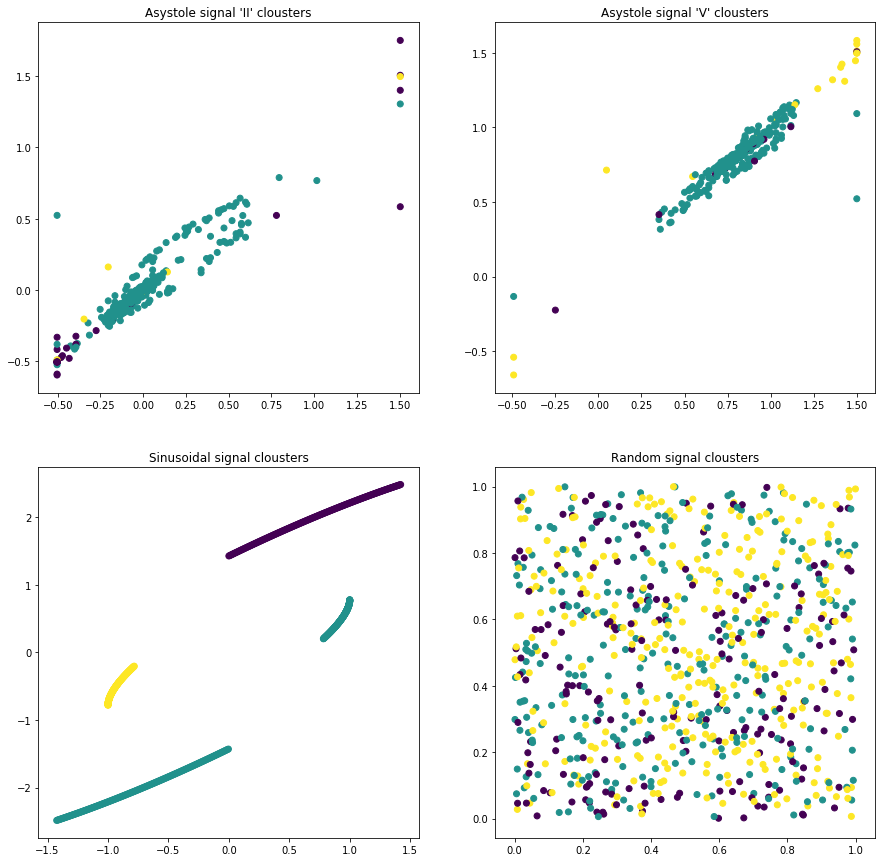

In [26]:
kmean_subploteo(sig, sig2, sig4, sig5, cluster_list, True)

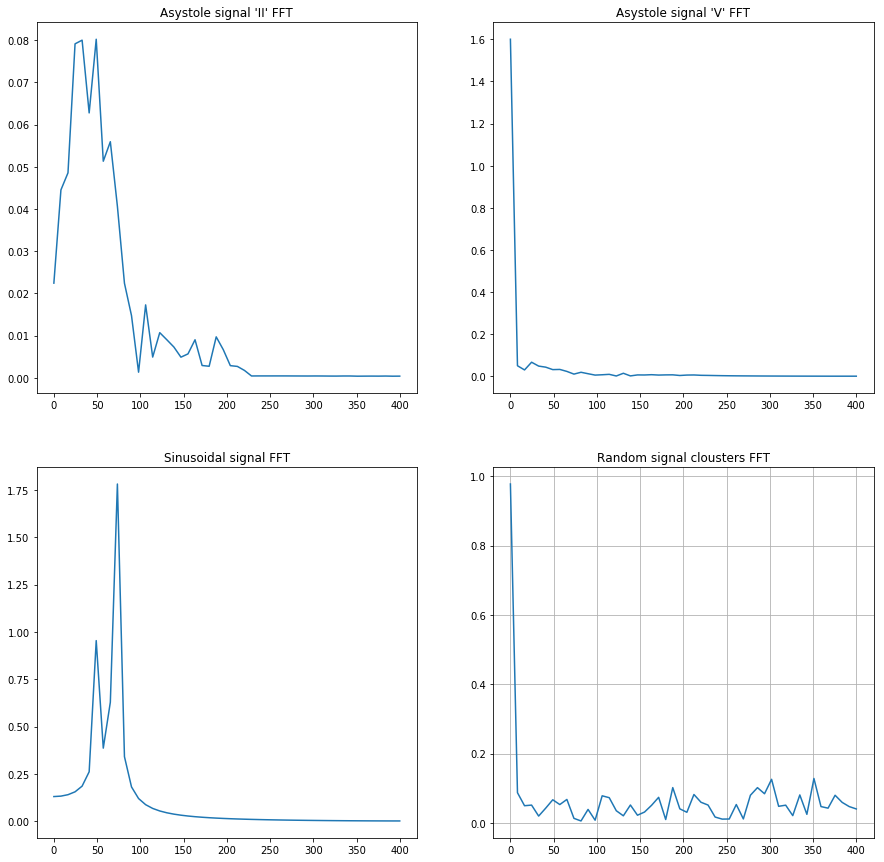

In [27]:
fft_array_list = [fft(sig[0]), fft(sig2[0]), fft(sig3[0]), fft(sig4[0]), fft(sig5[0]), fft(sig6[0])]
fft_subploteo(fft_array_list)

In [28]:
fft_sig = fft_sampler(sig)
fft_sig2 = fft_sampler(sig2)
fft_sig3 = fft_sampler(sig3)
fft_sig4 = fft_sampler(sig4)
fft_sig5 = fft_sampler(sig5)
fft_sig6 = fft_sampler(sig6)

/home/savi01/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


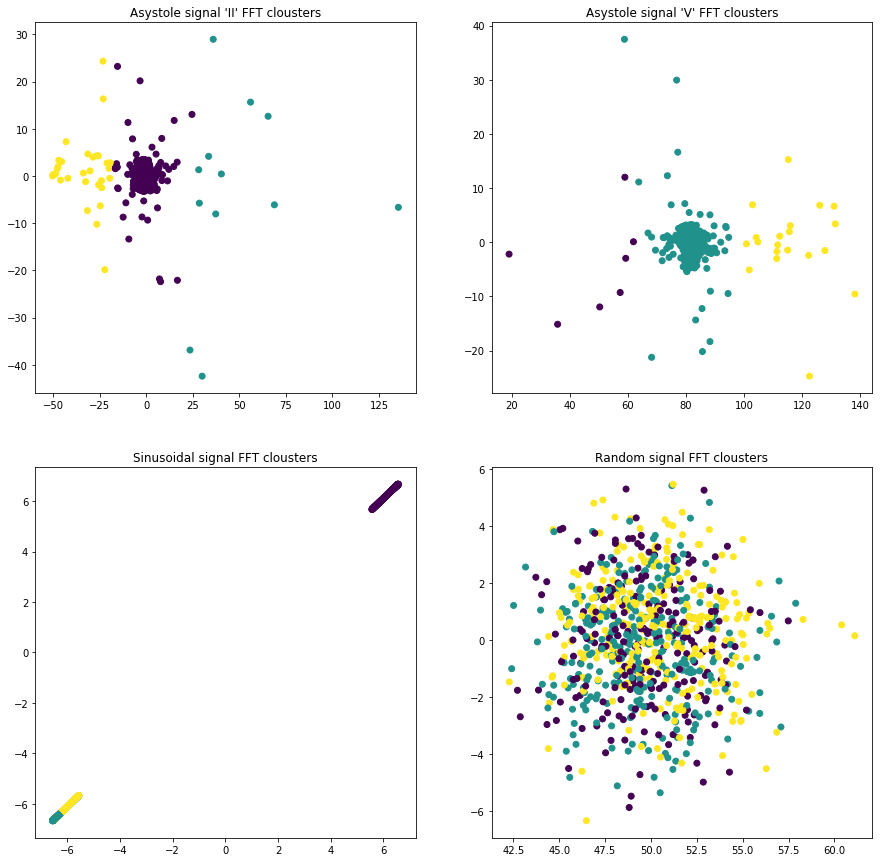

In [29]:
fft_cluster_list = [kmeans.fit_predict(fft_sig), kmeans.fit_predict(fft_sig2), kmeans.fit_predict(fft_sig3), 
                    kmeans.fit_predict(fft_sig4), kmeans.fit_predict(fft_sig5), kmeans.fit_predict(fft_sig6)]
kmean_subploteo(fft_sig, fft_sig2, fft_sig4, fft_sig5, fft_cluster_list, False)

## Visualization for CUT=10000

In [30]:
SAMPFROM = 0
SAMPTO = 80000
SAMPLES = SAMPTO - SAMPFROM
CUT = 10000
N = SAMPLES
N2 = CUT
T = 1/800

sig = signal_sampler(signals, CUT)
sig2 = signal_sampler(signals2, CUT)
sig3 = signal_sampler(signals3, CUT)
sig4 = signal_sampler(signals4, CUT)
sig5 = signal_sampler(signals5, CUT)
sig6 = signal_sampler(signals6, CUT)

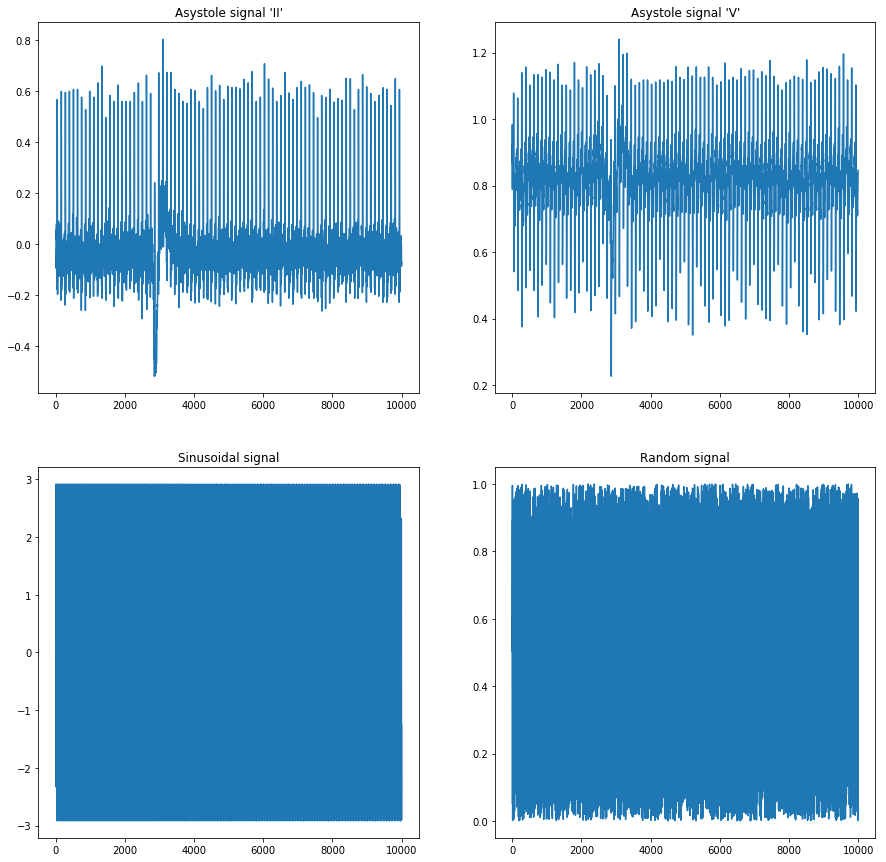

In [31]:
cluster_list = [kmeans.fit_predict(sig), kmeans.fit_predict(sig2), kmeans.fit_predict(sig3), 
                kmeans.fit_predict(sig4), kmeans.fit_predict(sig5), kmeans.fit_predict(sig6)]

sig_subploteo(sig[0], sig2[0], sig4[0], sig5[0])

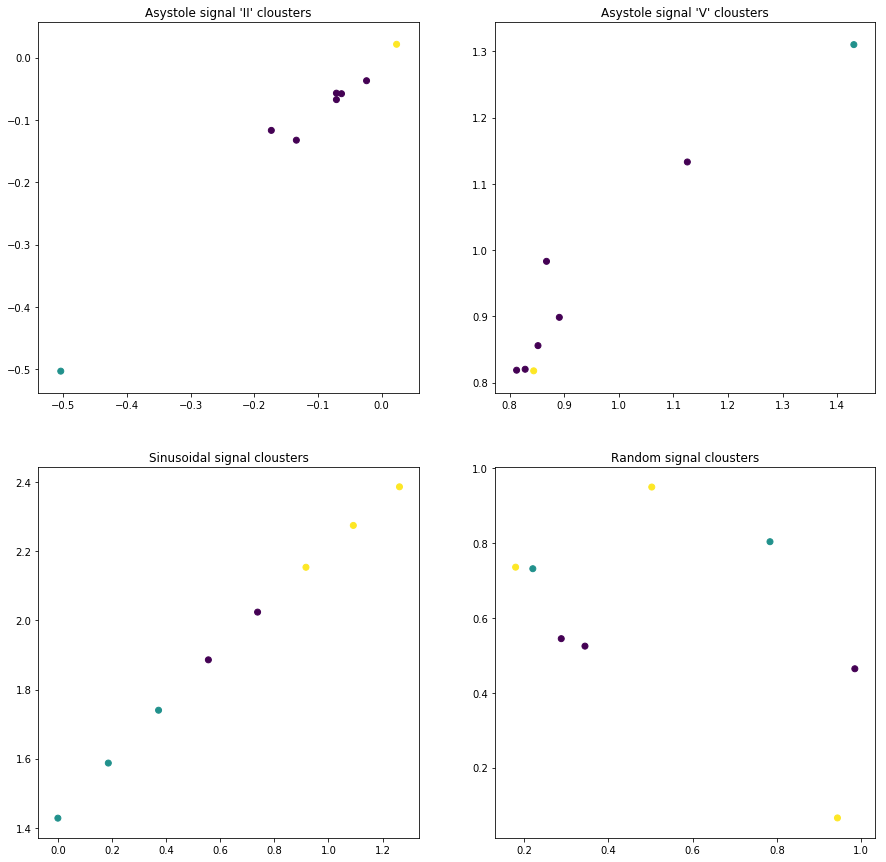

In [32]:
kmean_subploteo(sig, sig2, sig4, sig5, cluster_list, True)

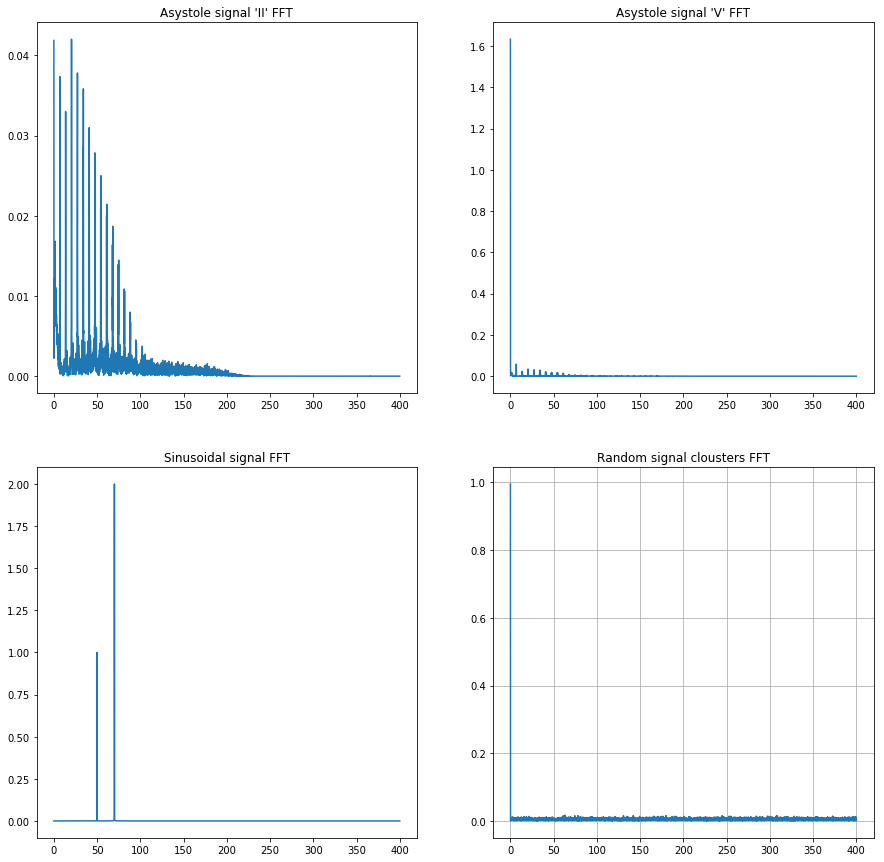

In [33]:
fft_array_list = [fft(sig[0]), fft(sig2[0]), fft(sig3[0]), fft(sig4[0]), fft(sig5[0]), fft(sig6[0])]
fft_subploteo(fft_array_list)

/home/savi01/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


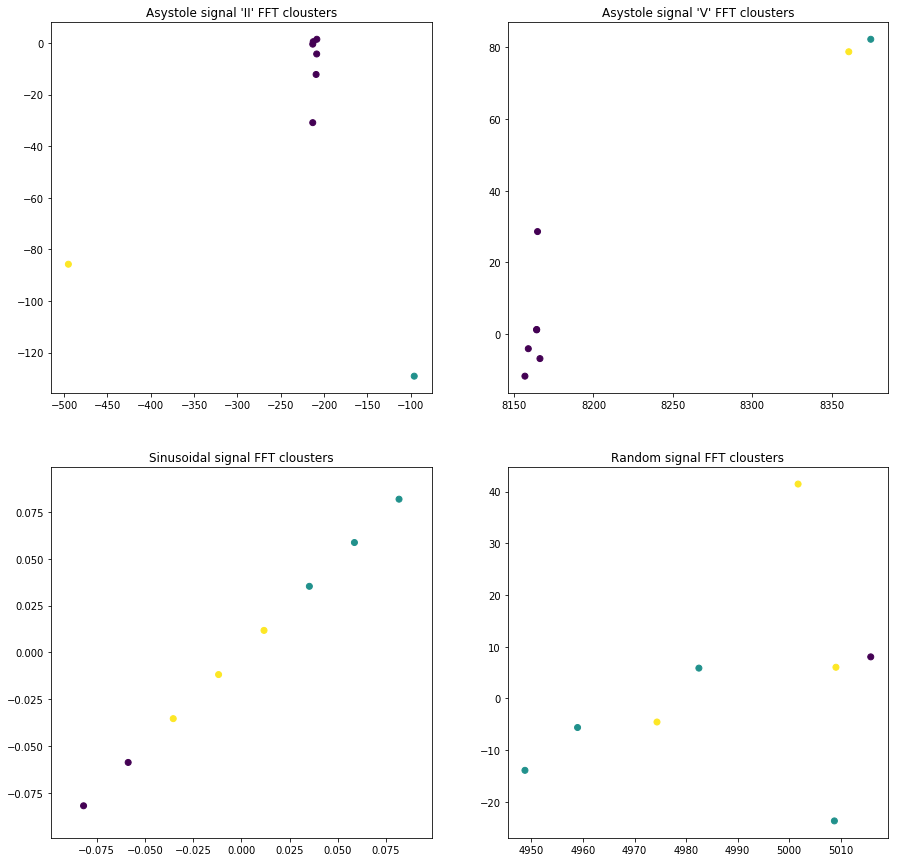

In [34]:
fft_sig = fft_sampler(sig)
fft_sig2 = fft_sampler(sig2)
fft_sig3 = fft_sampler(sig3)
fft_sig4 = fft_sampler(sig4)
fft_sig5 = fft_sampler(sig5)
fft_sig6 = fft_sampler(sig6)

fft_cluster_list = [kmeans.fit_predict(fft_sig), kmeans.fit_predict(fft_sig2), kmeans.fit_predict(fft_sig3), 
                    kmeans.fit_predict(fft_sig4), kmeans.fit_predict(fft_sig5), kmeans.fit_predict(fft_sig6)]
kmean_subploteo(fft_sig, fft_sig2, fft_sig4, fft_sig5, fft_cluster_list, False)